In [5]:
import sys
sys.path.append('..')

In [6]:
import tensorflow as tf
from tensorflow import keras

from run_utils import setup
from configs import dropout_config as config
from losses import MSE
from models import unet
from capsa import DropoutWrapper
from callbacks import VisCallback
from utils import notebook_select_gpu, load_depth_data, load_apollo_data, get_normalized_ds

notebook_select_gpu(1)

In [7]:
(x_train, y_train), (x_test, y_test) = load_depth_data()

ds_train = get_normalized_ds(x_train[:config.N_TRAIN], y_train[:config.N_TRAIN], shuffle=False)
ds_test = get_normalized_ds(x_test, y_test, shuffle=False)

_, (x_ood, y_ood) = load_apollo_data()
ds_ood = get_normalized_ds(x_ood, y_ood, shuffle=False)

2022-09-28 10:17:15.830417: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.72GiB (rounded to 6144000000)requested by op RealDiv
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-09-28 10:17:15.830783: W tensorflow/core/common_runtime/bfc_allocator.cc:491] ******************************_**************************************************___________________
2022-09-28 10:17:15.830821: W tensorflow/core/framework/op_kernel.cc:1733] RESOURCE_EXHAUSTED: failed to allocate memory


ResourceExhaustedError: failed to allocate memory [Op:RealDiv]

In [ ]:
model_name = 'notebook_dropout'
path, checkpoints_path, vis_path, plots_path, logs_path = setup(model_name)

## Load trained model

In [5]:
from utils import load_model, select_best_checkpoint

path, model_name = select_best_checkpoint('/home/iaroslavelistratov/results/dropout/20220924-155901-new_callback')
dropout_model = load_model(path, model_name, ds_test, quite=False)

Successfully loaded weights from /home/iaroslavelistratov/results/dropout/20220924-155901-new_callback/checkpoints/0.002692vloss_61778iter.tf.


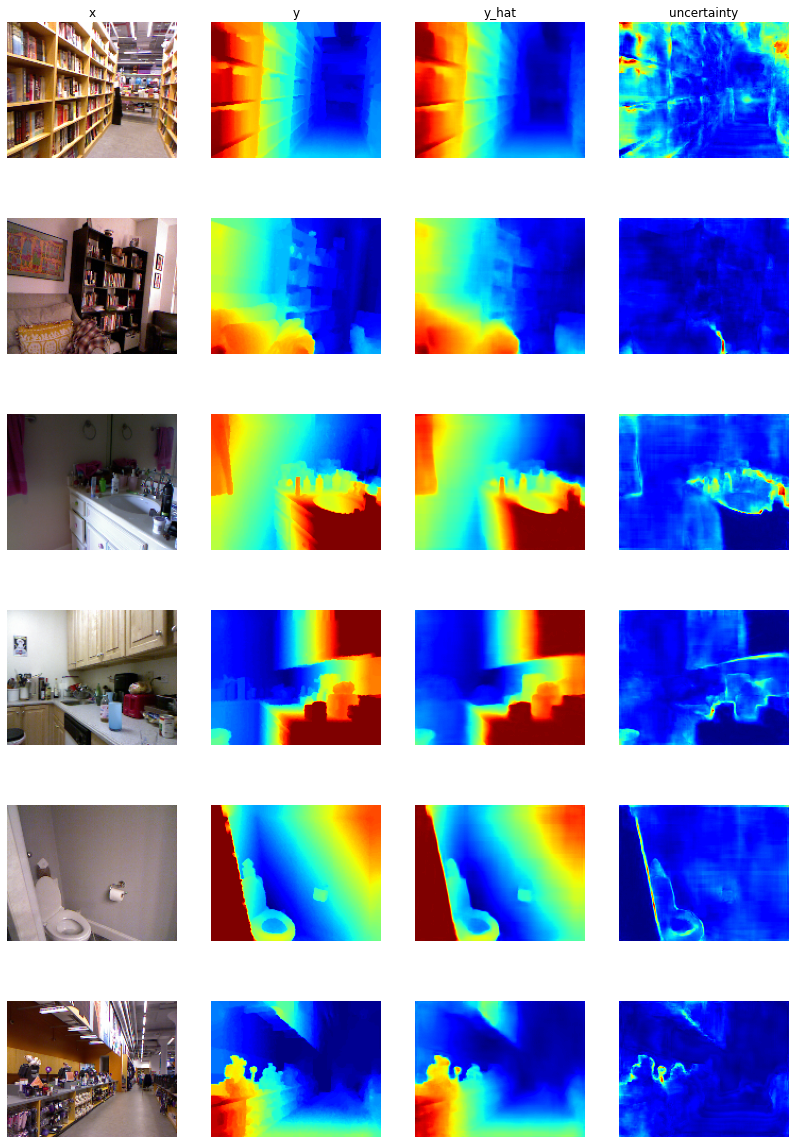

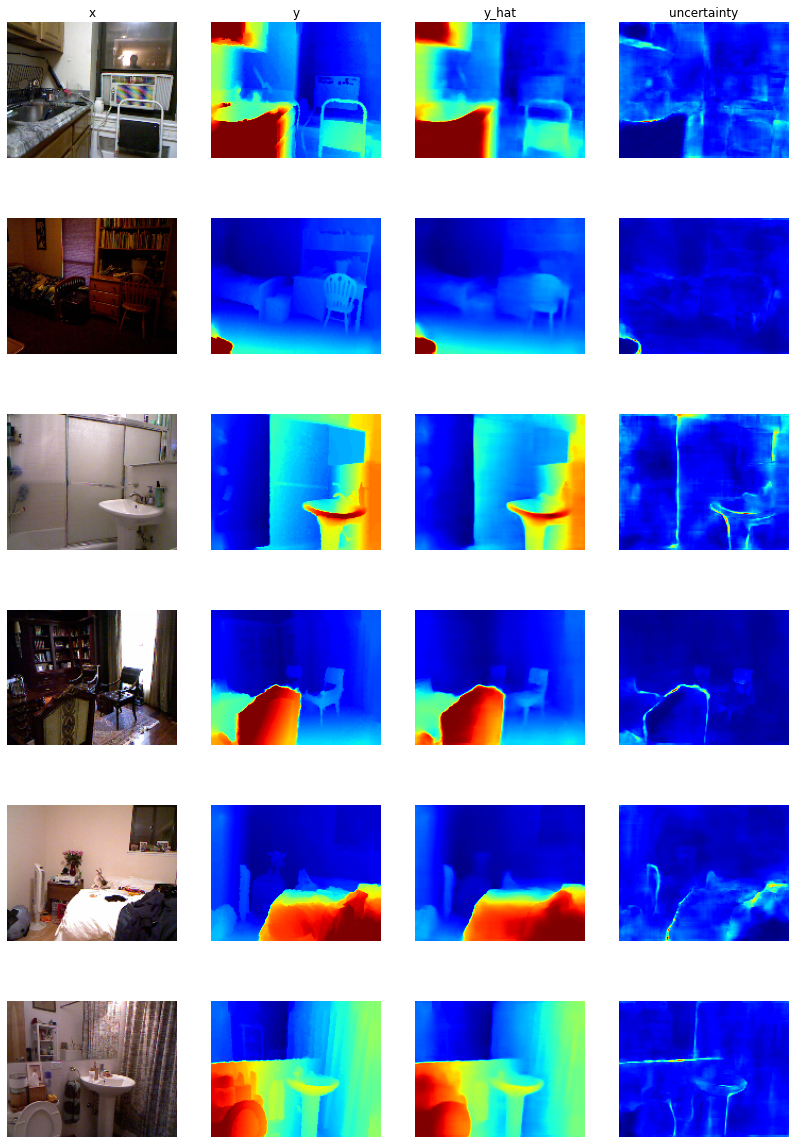

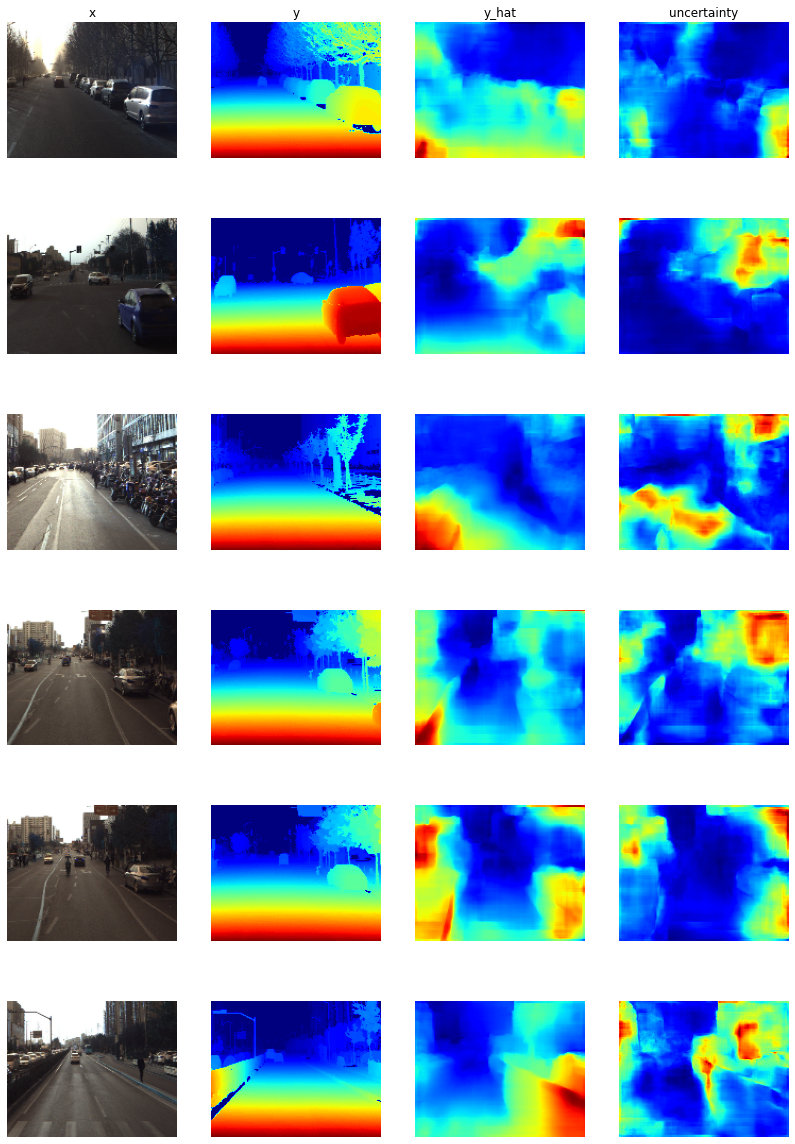

In [6]:
# from utils import visualize_depth_map

# visualize_depth_map(trained_model, ds_train, vis_path, f'trained_train', is_show=True)
# visualize_depth_map(trained_model, ds_test, vis_path, f'trained_test', is_show=True)
# visualize_depth_map(trained_model, ds_ood, vis_path, f'trained_ood', is_show=True)

2022-09-28 07:26:04.042048: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-28 07:26:05.673902: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Calibration curve

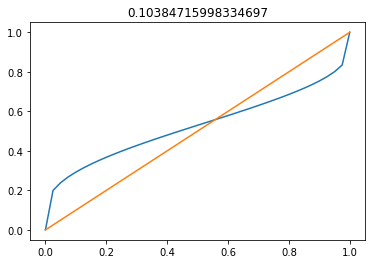

In [7]:
from visualizations import gen_calibration_plot
gen_calibration_plot(trained_model, ds_test)

## OOD plot

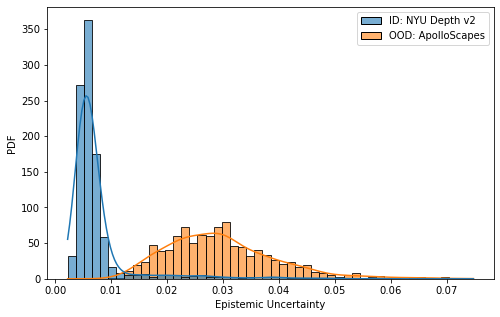

In [8]:
from utils import gen_ood_comparison
gen_ood_comparison(ds_test, ds_ood, trained_model, T=5, reduce='per_img', is_show=True)